In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-prediction/seattle-weather.csv
/kaggle/input/weatherprediction/seattle-weather.csv


**importing important libraries **

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pandas as pd

In [15]:
data=pd.read_csv("/kaggle/input/weatherprediction/seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [16]:
data.shape

(1461, 6)

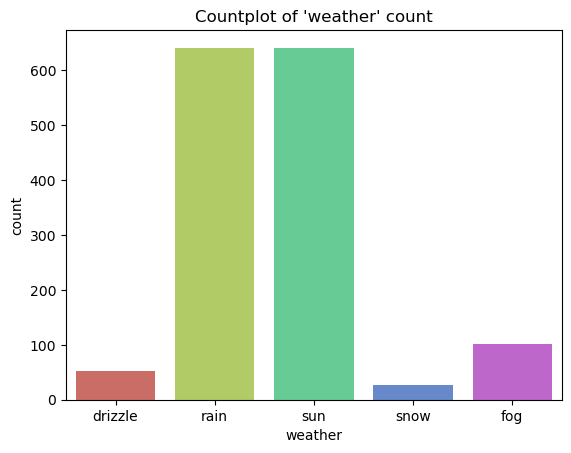

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot with hue for differentiation
sns.countplot(x="weather", data=data, palette='hls')

# Optional: You can set a title for the plot
plt.title("Countplot of 'weather' count")

# Display the plot
plt.show()




In [19]:
countrain=len(data[data.weather=='rain'])
countsun=len(data[data.weather=='sun'])
countdrizzle=len(data[data.weather=='drizzle'])
countsnow=len(data[data.weather=='snow'])
countfog=len(data[data.weather=='fog'])
print('percent of rain:{:2f}%'.format((countrain/(len(data.weather))*100)))
print('percent of sun:{:2f}%'.format((countsun/(len(data.weather))*100)))
print('percent of drizzle:{:2f}%'.format((countdrizzle/(len(data.weather))*100)))
print('percent of snow:{:2f}%'.format((countsnow/(len(data.weather))*100)))
print('percent of fog:{:2f}%'.format((countfog/(len(data.weather))*100)))

percent of rain:43.874059%
percent of sun:43.805613%
percent of drizzle:3.627652%
percent of snow:1.779603%
percent of fog:6.913073%


In [26]:
data[['precipitation','temp_max','temp_min','wind']].describe()
     

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<Axes: xlabel='wind', ylabel='Count'>

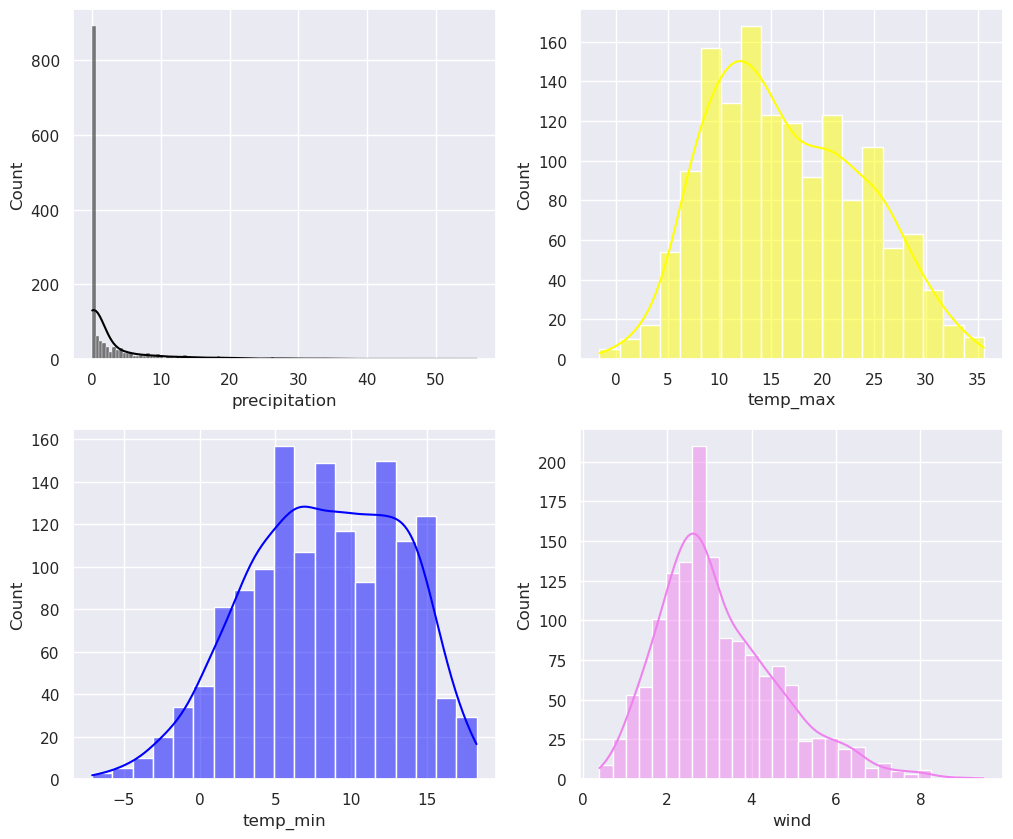

In [28]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(12,10))
sns.histplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='black')
sns.histplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='yellow')
sns.histplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x='wind',kde=True,ax=axs[1,1],color='violet')
     

<Axes: xlabel='wind'>

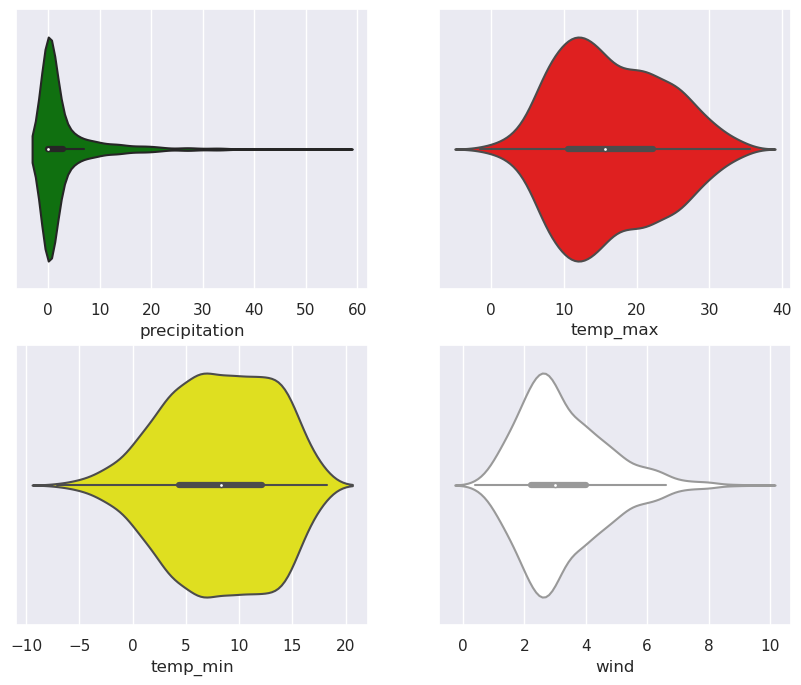

In [30]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='yellow')
sns.violinplot(data=data,x='wind',kde=True,ax=axs[1,1],color='white')

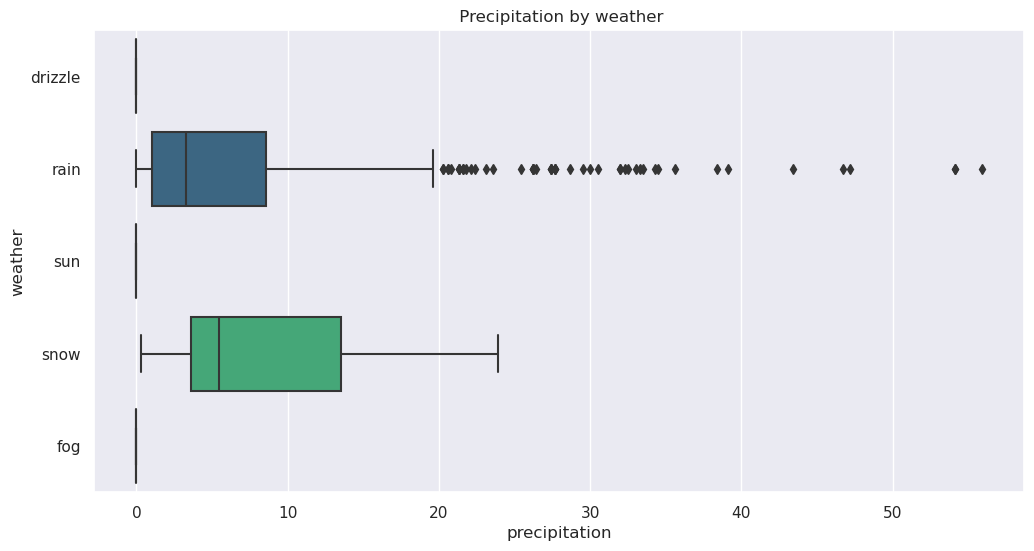

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='precipitation', y='weather', data=data, palette='viridis')

# Optional: You can set a title for the plot
plt.title(" Precipitation by weather")

# Display the plot
plt.show()



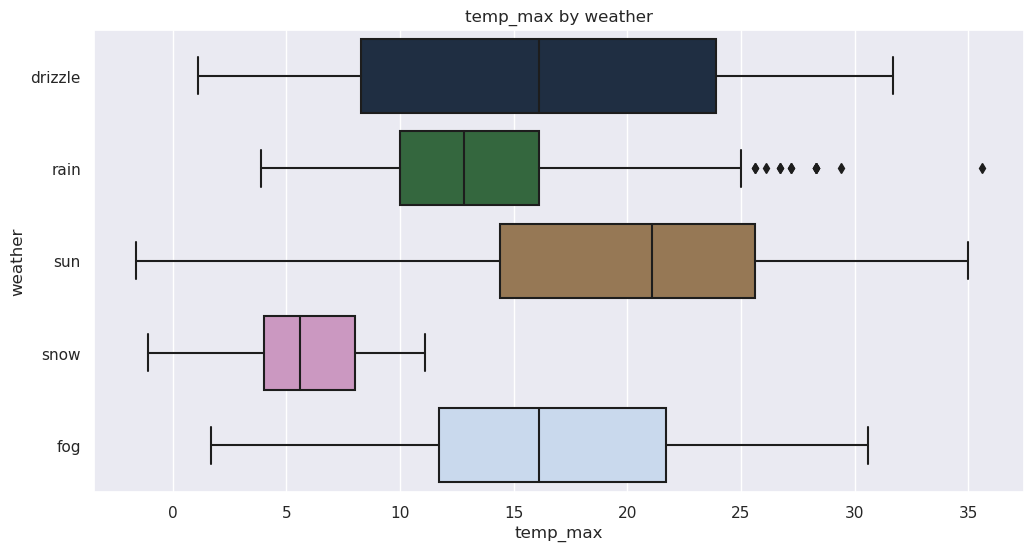

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='temp_max', y='weather', data=data, palette='cubehelix')

# Optional: You can set a title for the plot
plt.title("temp_max by weather")

# Display the plot
plt.show()


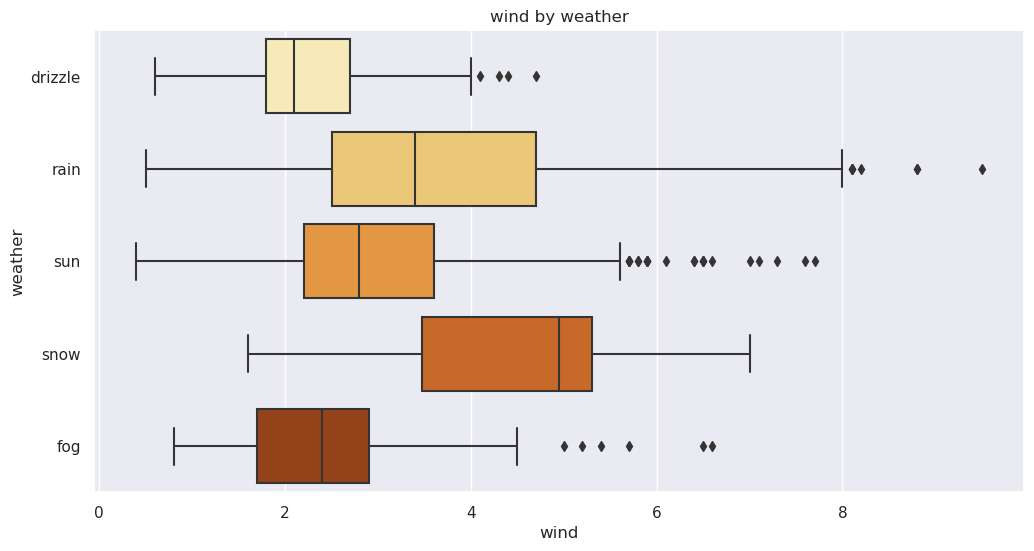

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='wind', y='weather', data=data, palette='YlOrBr')

# Optional: Set a title for the plot
plt.title("wind by weather")

# Display the plot
plt.show()


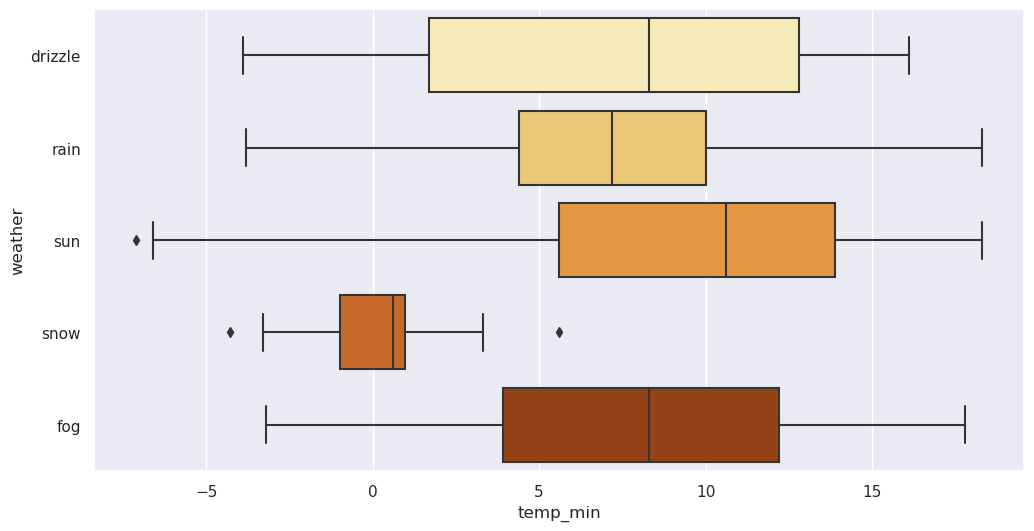

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='temp_min', y='weather', data=data, palette='YlOrBr')

# Display the plot
plt.show()



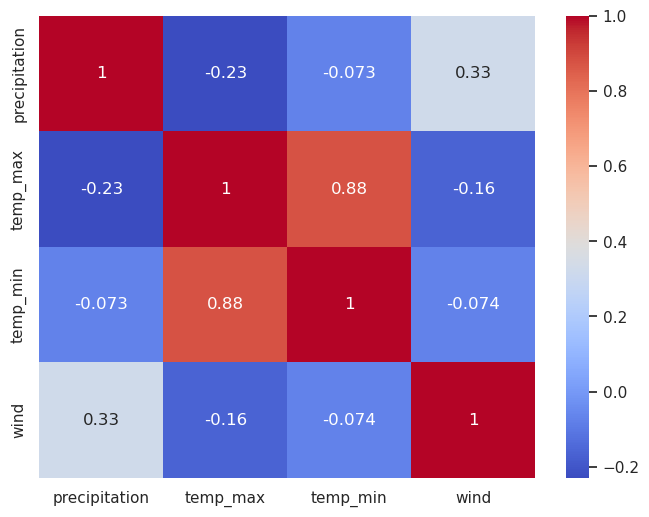

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()


pearsons correlation:  -0.22855481643297046
T test and P value:  Ttest_indResult(statistic=-51.60685279531918, pvalue=0.0)


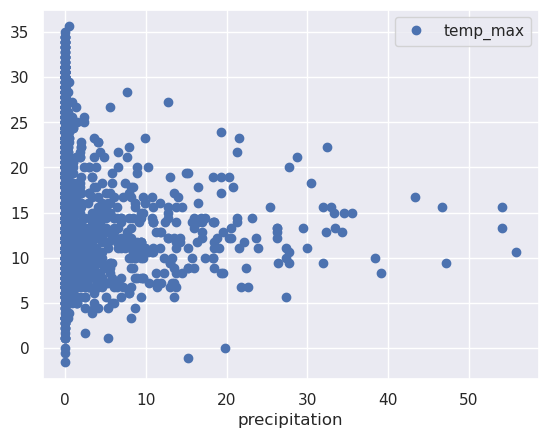

In [53]:
data.plot("precipitation",'temp_max',style='o')
print('pearsons correlation: ',data['precipitation'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['precipitation'],data['temp_max']))
     

pearsons correlation:  -0.22855481643297046
T test and P value:  Ttest_indResult(statistic=-51.60685279531918, pvalue=0.0)


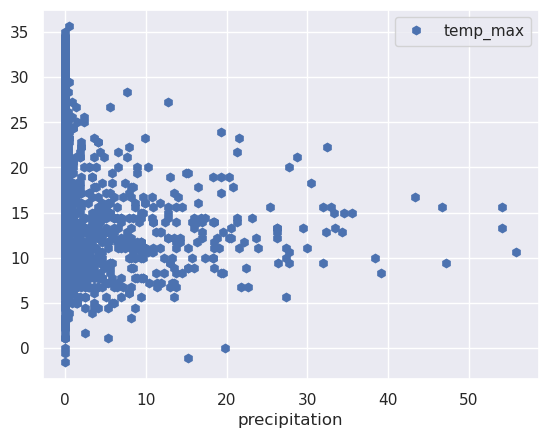

In [58]:
data.plot("precipitation",'temp_max',style='h')
print('pearsons correlation: ',data['precipitation'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['precipitation'],data['temp_max']))
     

pearsons correlation:  -0.16485663487495486
T test and P value:  Ttest_indResult(statistic=-67.3601643301846, pvalue=0.0)


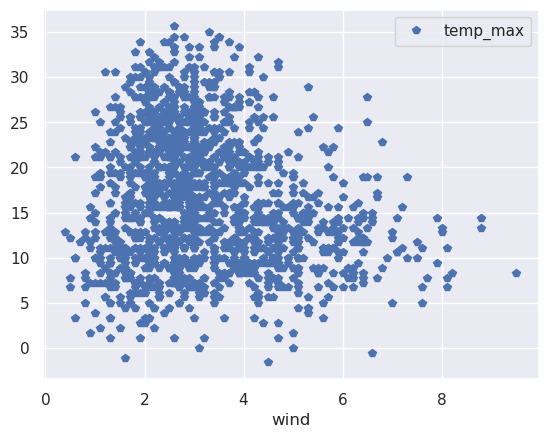

In [59]:
data.plot("wind",'temp_max',style='p')
print('pearsons correlation: ',data['wind'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['wind'],data['temp_max']))

<Axes: xlabel='temp_max'>

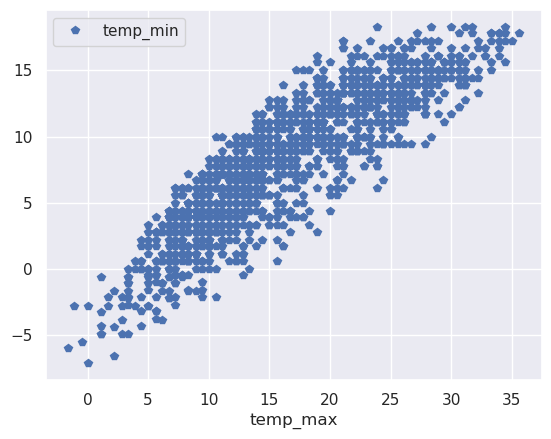

In [60]:

data.plot('temp_max','temp_min',style='p')
   

In [61]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

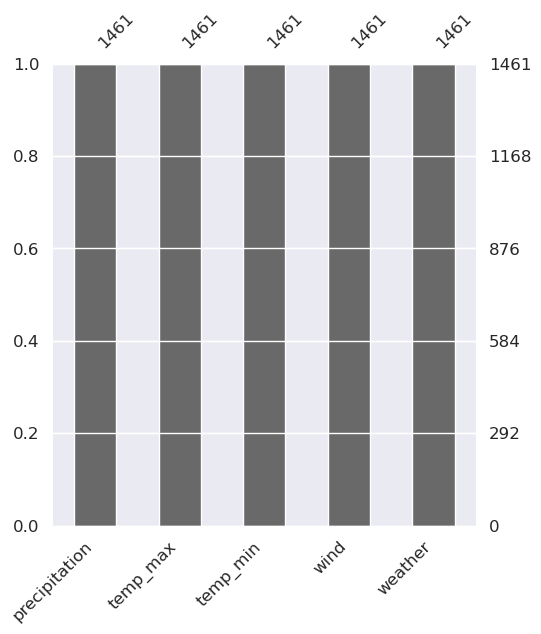

In [62]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data.drop(['date'],axis=1),ax=axz,fontsize=12)

<Axes: xlabel='wind', ylabel='Count'>

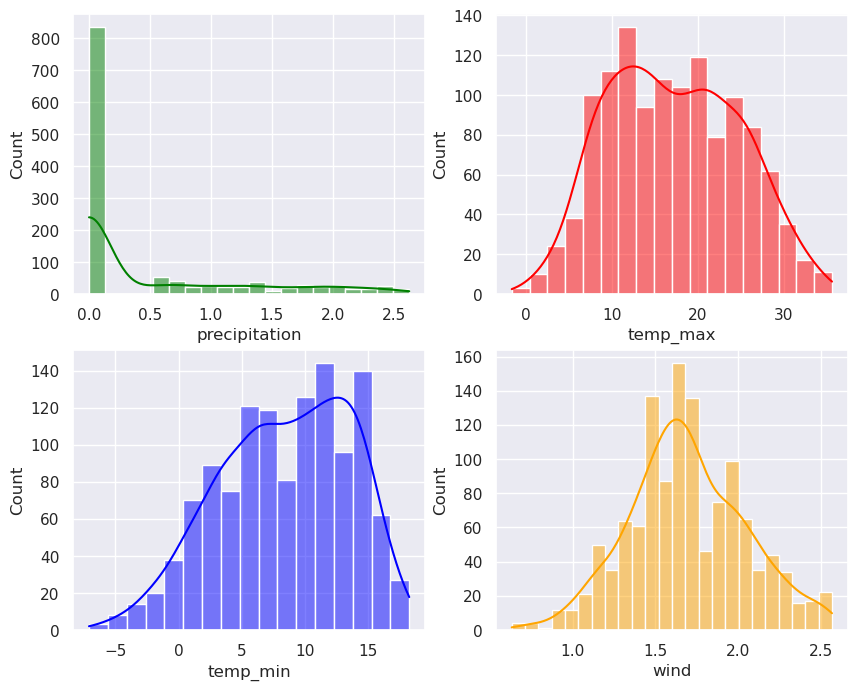

In [63]:
data=data.drop(['date'],axis=1)
     


Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
     

import numpy as np
data.precipitation=np.sqrt(data.precipitation)
data.wind=np.sqrt(data.wind)
     

sns.set(style='darkgrid')
fig, axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

In [64]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


In [66]:
lc=LabelEncoder()
data['weather']=lc.fit_transform(data['weather'])

In [67]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2


In [69]:
x=((data.loc[:,data.columns!='weather']).astype(int)).values[:,0:]
y=data['weather'].values

In [70]:
data.weather.unique()


array([0, 2, 4, 3, 1])

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [98]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('KNN accuracy:{:.2f}%'.format(knn.score(x_test,y_test)*100))

KNN accuracy:75.00%


In [95]:
svm=SVC()
svm.fit(x_train,y_train)
print('SVM accuracy:{:.2f}%'.format(svm.score(x_test,y_test)*100))

SVM accuracy:75.14%


In [101]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print('GBC accuracy:{:.2f}%'.format(gbc.score(x_test,y_test)*100))

GBC accuracy:80.65%


In [102]:
import warnings
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print('XGB accuracy:{:.2f}%'.format(xgb.score(x_test,y_test)*100))

XGB accuracy:83.06%


naive bayes


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.165, random_state=25)

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(x_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 75.98%


decision  tree

In [158]:
# Assuming "data" is your feature matrix and "weather" is your target variable
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, data['weather'], test_size=0.5, random_state=52)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(x_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 100.00%


In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform 5-fold cross-validation (you can change the number of folds as needed)
cv_scores = cross_val_score(dt_classifier, data.drop('weather', axis=1), data['weather'], cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the average cross-validation score
average_cv_score = cv_scores.mean()
print("Average Cross-Validation Score:", average_cv_score)


Cross-Validation Scores: [0.66396761 0.70040486 0.68016194 0.7398374  0.80487805]
Average Cross-Validation Score: 0.7178499720219875


In [160]:
#give your input as [precipitation,temp_max,temp_min,wind]

input=[[0.0,12.6,2.3,0.1]]
output=xgb.predict(input)
print('the weather is:')
if(output==0):
  print('Drizzle')
elif (output==1):
  print('fogg')
elif (output==2):
  print('rain')
elif (output==3):
  print('snow')
else:
  print('sun')

the weather is:
sun


In [114]:
import pickle
file = 'model.pkl'
pickle.dump(xgb, open(file, 'wb'))